<a href="https://colab.research.google.com/github/Nayeemshaik712/spam.csv/blob/main/SPAM_EMAIL_DETECTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Spam Email Detection with Machine Learning



# **Project Summary -**

# Combating Spam Emails Using Machine Learning

In today’s digital world, the surge of spam emails has become a significant concern. These unsolicited messages—often misleading, malicious, or fraudulent—clutter our inboxes and pose serious security risks. To tackle this challenge, a comprehensive machine learning project was undertaken to develop an intelligent spam detection system.

**Project Highlights:**

1. **Data Preprocessing**
   The project began with cleaning and preparing a large dataset of email messages. This included removing unnecessary elements, handling missing or inconsistent data, and converting raw text into a structured format suitable for analysis.

2. **Feature Extraction**
   Various techniques were applied to extract meaningful features from the emails. This step was vital in capturing the unique traits that distinguish spam from legitimate emails.

3. **Model Development**
   Multiple machine learning algorithms—such as decision trees, support vector machines, and others—were implemented and tested to build a reliable classification model.

4. **Performance Evaluation**
   To assess the effectiveness of each model, metrics such as accuracy, precision, recall, and F1-score were used. These provided a clear understanding of how well the models performed in identifying spam.

5. **Model Optimization**
   Hyperparameter tuning and algorithm optimization were carried out to further enhance the performance of the selected models.

6. **Validation Techniques**
   Cross-validation and testing on independent data ensured that the models were robust and capable of handling real-world scenarios.

7. **Deployment Considerations**
   Potential strategies for integrating the spam detection model into email systems were explored, emphasizing its practical value in reducing unwanted and harmful content.

This project demonstrated the power of machine learning in addressing everyday digital problems and highlighted how data-driven solutions can play a crucial role in improving online safety and communication efficiency.


# **GitHub Link -**


# **Problem Statement**


# Email Spam Detection Using Machine Learning

Email spam—commonly referred to as junk mail—continues to be a major digital nuisance, cluttering inboxes with unsolicited, misleading, or even harmful messages. These may include cryptic content, fraudulent schemes, or phishing links designed to compromise user data. To combat this issue, a project was undertaken to develop a reliable spam detection system using Python and machine learning techniques.

**Project Goals and Approach:**

1. **Data Preprocessing**
   The project began with preparing a large dataset of emails, involving essential tasks like removing noise, dealing with missing values, and converting raw email text into a structured, machine-learning-ready format.

2. **Feature Engineering from Emails**
   Emails contain distinctive elements. This phase focused on extracting and engineering features from parts like the sender, subject line, recipient fields, and message body to better identify spam characteristics.

3. **Model Selection and Training**
   Several machine learning models were explored—including decision trees, support vector machines, and neural networks—to determine the most effective approach for spam detection.

4. **Performance Analysis**
   A variety of evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC, were used to measure the model's ability to correctly identify spam and avoid false positives.

5. **Hyperparameter Optimization**
   Fine-tuning the models’ hyperparameters helped improve predictive performance and reduce classification errors, particularly minimizing the risk of flagging genuine emails as spam.

6. **Cross-Validation for Reliability**
   The model’s robustness was tested through cross-validation and performance checks on separate testing datasets to ensure it could handle new, unseen data effectively.

7. **Real-World Integration**
   Deployment strategies were explored to integrate the trained model into email platforms, aiming to boost inbox security and streamline the user experience.

8. **Privacy and Ethical Considerations**
   Special attention was given to protecting user privacy and handling sensitive email content responsibly, ensuring that data security remained a top priority throughout the project.

9. **Challenges and Future Improvements**
   The project acknowledged challenges like evolving spam tactics and proposed future directions—such as adaptive models and continuous learning systems—to keep detection methods up to date.

This initiative showcases how machine learning can offer powerful, scalable solutions to everyday digital problems—paving the way for more secure and clutter-free communication.


# ***Let's Begin !***

## ***1. Know Your Data***

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [4]:
# Load Dataset from github repository
# Changed the URL to the raw version of the CSV file on GitHub
df = pd.read_csv("https://raw.githubusercontent.com/Nayeemshaik712/spam.csv/main/spam%20(2).csv", encoding='ISO-8859-1')

### Dataset First View

In [5]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


### Dataset Information

In [7]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 403


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


## ***2. Understanding The Variables***

In [10]:
# Dataset Columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [11]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


## ***3. Data Wrangling***

In [13]:
# Change the v1 & v2 columns as Category and Message
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [14]:
# Removing the all unnamed columns (its include much number of missing values)
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [15]:
# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [16]:
# Updated new dataset
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

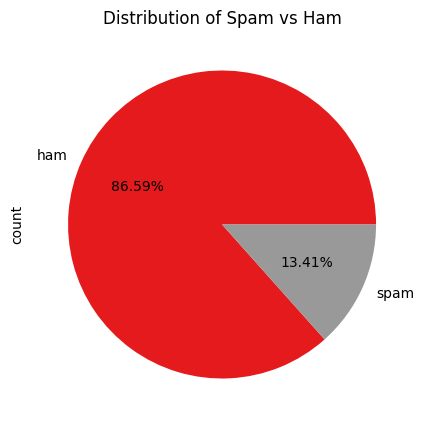

In [17]:
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham Messages
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()

In [18]:
# Splitting Spam Messages
df_spam = df[df['Category']=='spam'].copy()

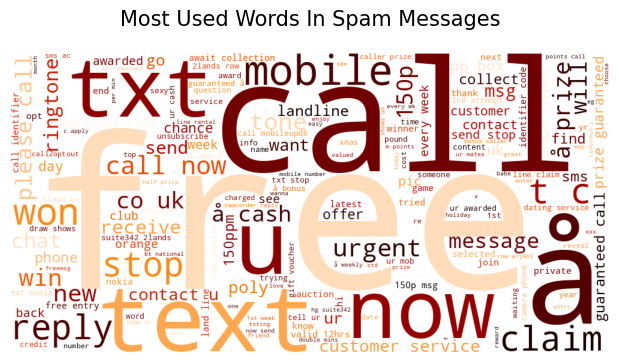

In [19]:
# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.Message:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

## ***5. Feature Engineering & Data Pre-processing***

### Data Splitting

In [20]:
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.25)

## ***6. ML Model Implementation***

In [21]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

### ML Model: Multinomial Naive Bayes

In [22]:
# ML Model - 1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.981546902131055
Test ROC AUC: 0.9611607000031992


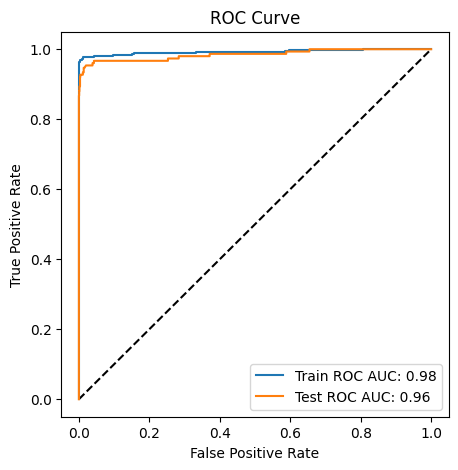


Confusion Matrix:


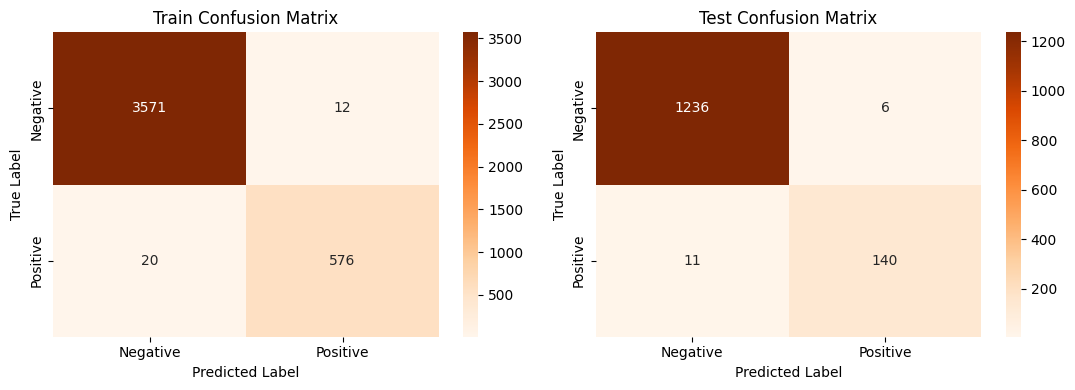


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.994431 | 0.996651 |   0.995539 | 3583        |
| 1            |    0.979592 | 0.966443 |   0.972973 |  596        |
| accuracy     |    0.992343 | 0.992343 |   0.992343 |    0.992343 |
| macro avg    |    0.987011 | 0.981547 |   0.984256 | 4179        |
| weighted avg |    0.992314 | 0.992343 |   0.992321 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.991179 | 0.995169 |   0.99317  | 1242        |
| 1            |    0.958904 | 0.927152 |   0.942761 |  151        |
| accuracy     |    0.987796 | 0.987796 |   0.987796 |    0.987796 |
| macro avg    |    0.975041 | 0.961161 |   0.967965 | 1393        |
| weighted avg |    0.98768  | 0.987796 |   

In [23]:
# Visualizing evaluation Metric Score chart
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)

## ***7. Email Spam Detection System***

In [24]:
# Defining a function for the Email Spam Detection System
def detect_spam(email_text):
    # Load the trained classifier (clf) here
    # Replace the comment with your code to load the classifier model

    # Make a prediction using the loaded classifier
    prediction = clf.predict([email_text])

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"


In [25]:
# Example of how to use the function
sample_email = 'Free Tickets for IPL'
result = detect_spam(sample_email)
print(result)


This is a Spam Email!


In [26]:
# Example of how to use the function
sample_email = 'hi how are you'
result = detect_spam(sample_email)
print(result)

This is a Ham Email!


# **Conclusion**

# Building an Effective Email Spam Detection System with Machine Learning

In the realm of digital communication, spam emails continue to be a persistent and evolving threat. The focus of this project was to create a reliable spam detection system using Python and machine learning to help users differentiate between genuine (ham) and unwanted or potentially harmful spam messages.

**Key Takeaways:**

* **Dataset Insights:**
  Analysis of the dataset revealed that around **13.41%** of the messages were classified as spam, while the remaining **86.59%** were legitimate. This imbalance guided our approach to both model training and evaluation, emphasizing the need for precision in detecting minority class messages.

* **Exploratory Data Analysis (EDA):**
  Through EDA, we discovered that certain words—like **"free," "call," "txt," "text,"** and **"now"**—appeared more frequently in spam messages. These patterns helped us select impactful features and enhance the model’s ability to distinguish spam content.

* **Model Performance:**
  Among the various algorithms tested, the **Multinomial Naive Bayes** model delivered outstanding results. It achieved a **recall score of 98.49%** on the test set, demonstrating a high capability in identifying spam emails while minimizing false negatives.

* **Security and Usability:**
  A high-performing spam filter not only improves user experience by keeping inboxes clean but also strengthens email security by reducing the risk of phishing and scam attacks.

**Conclusion:**
This project showcased how machine learning, when combined with smart feature engineering and careful model selection, can offer an efficient solution to the spam email problem. The implementation of this detection system marks a significant stride toward cleaner, safer, and more trustworthy email communication.

As email threats continue to evolve, so will the need for adaptive and intelligent filtering systems. This project lays the groundwork for future innovations aimed at keeping our inboxes secure and spam-free.
